In [1]:
from rich import print as rprint
import pandas as pd
import numpy as np
import utility
import bank_run


Importing above modules, the only required ones for analysis are utility, bank_run, and pandas. The rest are up to the user
to use if they wish.


In [2]:
svb_dfs = utility.csv_to_dataframe("SVB_CSV/")

The above utility function, csv_to_dataframe, takes a folder with csv files and turns them all into pandas dataframes that is 
stored in a python dictionary object.
Their names are "folder name"_"file name"_df. To get the dataframe, call the dictionary object with the name of the df.
for example with wells_fargo_dfs we could choose wells_fargo_dfs['wells_fargo_loans_df'].

In [3]:
for a in svb_dfs.keys():
    print(a)
    display(svb_dfs[a])
#Going through dictionary of dataframes and diaplying them all with dataframe name above.

SVB_CSV_svb_capital_adequacy_df


,SVB Financial,Bank
Component,,
CET1 Capital,13697.00,16995.00
Tier 1 Capital,17504.00,16995.00
Total Capital,18380.00,17871.00
Risk-weighted assets,113628.00,111353.00
Average assets,215740.00,213436.00
CET1 Capital Ratio,12.05,15.26
Tier 1 Capital Ratio,15.40,15.26
Total Capital Ratio,16.18,16.05
Tier 1 Leverage Ratio,8.11,7.96


SVB_CSV_svb_credit_risk_exposure_by_geographic_region_df


,Loans,Debt Securities,Total Exposure
Geographic region,,,
U.S.,62946,116302,179248
Non-U.S. North America,1144,0,1144
U.K,2923,1040,3963
Cayman Islands,1986,0,1986
Other,5251,48,5299
Total,74250,117390,191640


SVB_CSV_svb_credit_risk_exposure_by_product_type_and_counterparty_df


,Global Funds,Technology & Healthcare,Other Commercial,Consumers,Public,Banks,Total
Product Type,,,,,,,
Loans,41270,17306,6470,9204,0,0,74250
Unfunded Credit Commitments,37887,16220,2273,2511,0,0,58891
Repo-style transactions,0,0,1314,0,0,0,1314
Debt Securities,703,116687,0,0,0,0,117390
OTC Derivatives,205,261,0,0,0,0,466
Cleared Derivatives,0,0,0,0,0,0,0
Total,79157,33527,10965,11715,116687,261,252311


SVB_CSV_svb_credit_risk_exposure_by_product_type_contractual_maturity_df


,<1 Year,1-5 Years,>5 years,Total
Product Type,,,,
Loans,43040,18153,13057,74250
Unfunded Credit Commitments,44134,13912,845,58891
Repo-style transactions,1314,0,0,1314
Debt Securities,1153,15520,100717,117390
OTC Derivatives,206,153,107,466
Cleared Derivatives,0,0,0,0
Total,89848,47738,114726,252311


SVB_CSV_svb_regulatory_capital_components_df


,Risk Based Capital Amounts
Regulatory Capital Components,
Common stock plus related surplus_net of treasury stock,5318
Retained earnings,8951
Accumulated other comprehensive income (AOCI),-1911
Common Equity Tier 1 capital (CET1) before adjustments and deductions,12358
Less: Goodwill (net of associated deferred taxes),-365
Intangibles (net of associated deferred taxes),-113
Deferred tax assets (DTAs) that arise from net operating loss and tax credit carry-forwards_net of any related valuation allowances and net of DTLs,123
AOCI opt-out election related adjustments,-1880
Add: CECL transition provision,60


SVB_CSV_svb_rwa_standardized_approach_df


,RWA_amount
RWA_category,
Corporate exposures,65630
Exposures to GSEs,13766
Equity exposures,3180
Residential mortgage exposures,4628
Other assets,2458
Exposures to PSEs,1578
Exposures to U.S. depository institutions,164
Exposures to foreign banks,353
Past due loans,113


In [4]:
rprint(svb_dfs.keys())

#Printing all the key names which will be the names of the dataframe.


dict_keys(['SVB_CSV_svb_capital_adequacy_df', 'SVB_CSV_svb_credit_risk_exposure_by_geographic_region_df', 
'SVB_CSV_svb_credit_risk_exposure_by_product_type_and_counterparty_df', 
'SVB_CSV_svb_credit_risk_exposure_by_product_type_contractual_maturity_df', 
'SVB_CSV_svb_regulatory_capital_components_df', 'SVB_CSV_svb_rwa_standardized_approach_df'])

Will only used rwa at face value for bank run sim to reduce complexity

In [5]:
#wells_fargo_loans_df = wells_fargo_dfs['wells_fargo_loans_df']
#wells_fargo_loans_df

In [6]:
#wells_fargo_Mortgages_df = wells_fargo_dfs['wells_fargo_Mortgages_df']
#wells_fargo_Mortgages_df

In [7]:
intial_capital =18380*10**6
intial_rwa = 113628*10**6
intial_cash_on_hand = 175*10**9

nsim = 100000
svb_br = bank_run.BankRun(intial_capital ,intial_rwa, intial_cash_on_hand,num_iterations = nsim ) 
#Most numbers are in millions, expect cash_at_hand which is in billions



Creating BankRun object from bank_run.py file. Need the following parameters inputed:
    total capital
    rwa
    inital_cash_on_hand (deposits)
    num_iterations (default is 1000 and so can be left blank)

In [8]:
svb_bank_run_df  = svb_br.bank_run_sim()

In [9]:
svb_bank_run_df 
#The dataframe returned from the bank run simulation, each row is one bank run event

,withdrawal_amt,capital,credit_risk_assets,discount_rate,cet1_ratio,success
simulation_number,,,,,,
0,35000000000.0,11257142857.142857,89885142857.142853,0.3,0.125239,True
1,52500000000.0,-32800000000.0,28328000000.0,0.6,-1.157865,False
2,35000000000.0,-6550000000.0,72078000000.0,0.6,-0.090874,False
3,35000000000.0,-6550000000.0,72078000000.0,0.6,-0.090874,False
4,52500000000.0,3757142857.142857,64885142857.142853,0.3,0.057905,False
...,...,...,...,...,...,...
99995,52500000000.0,-32800000000.0,28328000000.0,0.6,-1.157865,False
99996,35000000000.0,-6550000000.0,72078000000.0,0.6,-0.090874,False
99997,35000000000.0,7300000000.0,85928000000.0,0.4,0.084955,True


<Axes: xlabel='[discount_rate]', ylabel='[cet1_ratio]'>

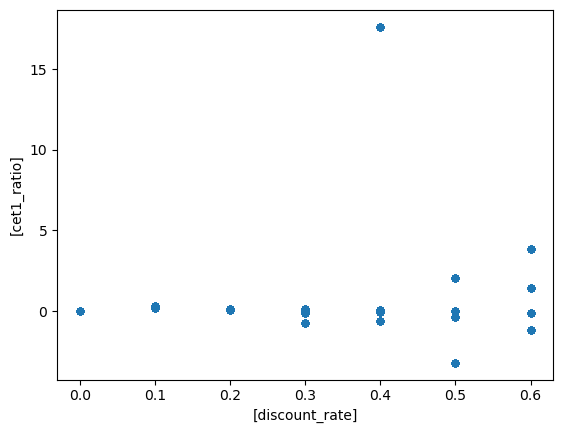

In [10]:
svb_bank_run_df .plot.scatter(y = ['cet1_ratio'], x = ['discount_rate'])#, 'capital'])

<Axes: xlabel='[withdrawal_amt]', ylabel='[cet1_ratio]'>

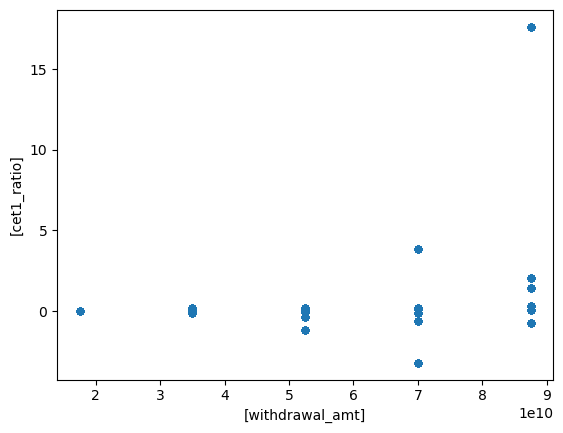

In [11]:
svb_bank_run_df .plot.scatter(y = ['cet1_ratio'], x = ['withdrawal_amt'])

<Axes: xlabel='[capital]', ylabel='[cet1_ratio]'>

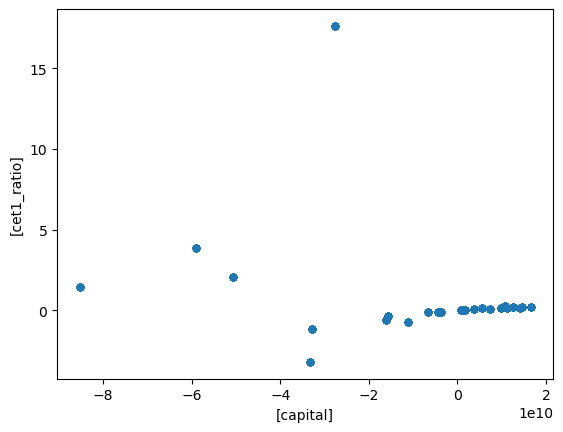

In [12]:
svb_bank_run_df .plot.scatter(y = ['cet1_ratio'], x = ['capital'])

<Axes: xlabel='[credit_risk_assets]', ylabel='[cet1_ratio]'>

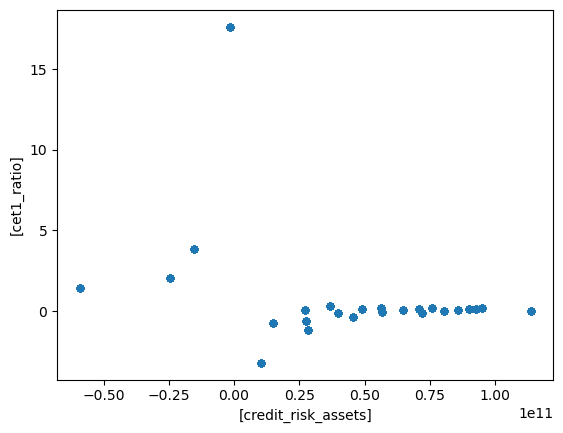

In [13]:
svb_bank_run_df .plot.scatter(y = ['cet1_ratio'], x = ['credit_risk_assets'])

In [14]:
svb_bank_run_df ['success'].value_counts()

False    58302
True     41698
Name: success, dtype: int64